In [1]:
pip install tifffile


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install rasterio

     |████████████████████████████████| 21.1 MB 9.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
from platform import python_version

print(python_version())

3.8.8


In [2]:
pip install gdal

  Using cached GDAL-3.3.2.tar.gz (747 kB)
  Created wheel for gdal: filename=GDAL-3.3.2-cp38-cp38-macosx_10_9_x86_64.whl size=1097163 sha256=a87ed98e1f7df2dab5f2cc0a1408a52971bdddc94638bb5114c8c4b0ae467782
  Stored in directory: /Users/yusufakcakaya/Library/Caches/pip/wheels/a1/0f/e3/11c862025796b370d59cde2313fe2ddfa90ecfdbf4c90a644c
Successfully built gdal
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install rioxarray


     |████████████████████████████████| 46 kB 1.6 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 7.5 MB 334 kB/s eta 0:00:01
     |████████████████████████████████| 827 kB 14.5 MB/s eta 0:00:01
  Created wheel for rioxarray: filename=rioxarray-0.8.0-py3-none-any.whl size=54247 sha256=8b1fa75b5eeb48d2f5bc3d6f09f3de61b8f26222630f7de426317e5a613fac5d
  Stored in directory: /Users/yusufakcakaya/Library/Caches/pip/wheels/27/30/db/49a88da91de2f2ba962dbd45d22c656e14bf90d980fe0ec8c6
Successfully built rioxarray
Note: you may need to restart the kernel to use updated packages.


In [30]:
import os
import subprocess
from osgeo import gdal
import rioxarray
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from bs4 import BeautifulSoup
from selenium import webdriver
import shutil
import time
import pandas as pd


### WELCOME TO 3D HOUSE PROJECT

In [2]:
print('Welcome to 3D House Modelling Project \nPlease enter your adress!')


Welcome to 3D House Modelling Project 
Please enter your adress!


In [14]:
street_name = input('Enter your street name: ')

Enter your street name: Hanzestedenplaats


In [15]:
house_number = int(input('Enter your house number: '))

Enter your house number: 1


In [16]:
post_code = int(input('Enter your post code: '))

Enter your post code: 2000


In [35]:
response_API = requests.get('https://api.basisregisters.vlaanderen.be/v1/adresmatch',
                            params= {'straatnaam':street_name ,
                                     'huisnummer':house_number , 
                                     'postcode': post_code} ).json()


coordinates = response_API['adresMatches'][0]['adresPositie']['point']['coordinates']
x = coordinates[0]
y = coordinates[1]

gebouweenheden = requests.get(response_API['adresMatches'][0]['adresseerbareObjecten'][0]['detail']).json()
gebouw = requests.get(gebouweenheden['gebouw']['detail']).json()
polygon_list = gebouw['geometriePolygoon']['polygon']['coordinates'][0]

print(x)
print(y)

152511.31
213222.39


In [32]:
polygon_list

[[152522.00276499987, 213204.01320597157],
 [152521.91034899652, 213205.16488597542],
 [152521.9431169927, 213205.1148379743],
 [152521.98081299663, 213205.0683739744],
 [152522.02311699837, 213205.0260059759],
 [152522.06945299357, 213204.98818197474],
 [152522.1194369942, 213204.95528597385],
 [152522.17255699635, 213204.92763797566],
 [152522.2229249999, 213204.90523797274],
 [152522.27546899766, 213204.88834197447],
 [152522.32948499918, 213204.8773339726],
 [152522.38439700007, 213204.8722139746],
 [152522.43956499547, 213204.87310997397],
 [152522.4942849949, 213204.87995797396],
 [152522.5470849946, 213204.89243797213],
 [152522.59822099656, 213204.91048597544],
 [152522.64718099684, 213204.933909975],
 [152522.69332499802, 213204.96245397255],
 [152522.7362049967, 213204.99566997588],
 [152522.77524499595, 213205.03336597234],
 [152522.80839699507, 213205.07272597402],
 [152522.83738899976, 213205.115285974],
 [152522.86190100014, 213205.16046997532],
 [152522.88180499524, 2132

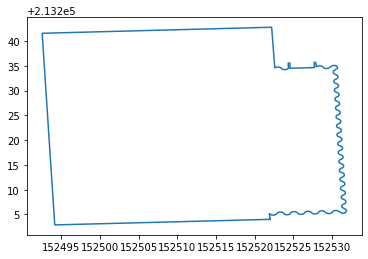

In [33]:
#Create lists of x and y values of the polygon
x_pol, y_pol = zip(*polygon_list)

#Plot the shape of the polygon to see what we can expect as the shape of the house
plt.figure()
plt.plot(xs,ys) 
plt.show()

In [39]:
df = pd.read_csv('list_of_bounds.csv') 
df.head()

,File Number,Left Bound,Right Bound,Top Bound,Bottom Bound
0,1,145000.0,162000.0,247000.0,238000.0
1,2,162000.0,194000.0,250000.0,238000.0
2,3,194000.0,206000.0,248000.0,238000.0
3,4,53000.0,66000.0,225500.0,218000.0
4,5,66000.0,98000.0,232000.0,218000.0


In [49]:
#finding the file number

bound_file = df[(df['Left Bound'] < x) & (df['Right Bound'] > x)
             & ((df['Bottom Bound'] < y) & (df['Top Bound'] > y))]
    
file_number = bound_file['File Number'].iloc[0]
    

In [57]:
if file_number < 10:
    DSM_url = (f'zip+https://downloadagiv.blob.core.windows.net/dhm-vlaanderen-ii-dsm-raster-1m/DHMVIIDSMRAS1m_k0{file_number}.zip') 
    DTM_url = (f'zip+https://downloadagiv.blob.core.windows.net/dhm-vlaanderen-ii-dtm-raster-1m/DHMVIIDTMRAS1m_k0{file_number}.zip') 
else:
    DSM_url = (f'zip+https://downloadagiv.blob.core.windows.net/dhm-vlaanderen-ii-dsm-raster-1m/DHMVIIDSMRAS1m_k{file_number}.zip') 
    DTM_url = (f'zip+https://downloadagiv.blob.core.windows.net/dhm-vlaanderen-ii-dtm-raster-1m/DHMVIIDTMRAS1m_k{file_number}.zip') 

                

If you loaded two rasters with different projections in QGIS or ArcGIS, you’d see that they would align since these software reproject “on-the-fly”. But with R or Python, you’ll need to reproject your data yourself in order to plot or use these rasters together in calculations.

For this episode, we will be working with the Harvard Forest Digital Terrain Model (DTM). This differs from the surface model data we’ve been working with so far in that the digital surface model (DSM) includes the tops of trees, while the digital terrain model (DTM) shows the ground level beneath the tree canopy.

Our goal is to get these data into the same projection with the rioxarray.reproject_match() function so that we can use both rasters to calculate tree canopy height, also called a Canopy Height Model (CHM).

First, we need to read in the DSM and DTM rasters.

In [63]:
#DSM 
DSM = rasterio.open('zip+https://downloadagiv.blob.core.windows.net/dhm-vlaanderen-ii-dsm-raster-1m/DHMVIIDSMRAS1m_k15.zip!/GeoTIFF/DHMVIIDSMRAS1m_k15.tif')
DSM.bounds


BoundingBox(left=130000.0, bottom=198000.0, right=162000.0, top=218000.0)

In [5]:
#DTM of k03

terrain_k3= rioxarray.open_rasterio("/Users/yusufakcakaya/Desktop/DHMVIIDTMRAS1m_k03/GeoTIFF/DHMVIIDTMRAS1m_k03.tif", masked=True)
terrain_k3

<xarray.DataArray (band: 1, y: 10000, x: 12000)>
[120000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 1.94e+05 1.94e+05 1.94e+05 ... 2.06e+05 2.06e+05
  * y            (y) float64 2.48e+05 2.48e+05 2.48e+05 ... 2.38e+05 2.38e+05
    spatial_ref  int64 0
Attributes:
    STATISTICS_MAXIMUM:  30.120000839233
    STATISTICS_MEAN:     20.765322320988
    STATISTICS_MINIMUM:  13.050000190735
    STATISTICS_STDDEV:   3.042659971035
    scale_factor:        1.0
    add_offset:          0.0

We can perform raster calculations by subtracting (or adding, multiplying, etc.) two rasters. In the geospatial world, we call this “raster math”, and typically it refers to operations on rasters that have the same width and height (including nodata pixels). We saw from the last episode’s Challenge this is not the case with our DTM and DSM. Even though the reproject function gets our rasters into the same CRS, they have slightly different extents. We can now use the reproject_match function, which both reprojects and clips a raster to the CRS and extent of another raster.

In [6]:
terrain_k3_matched = terrain_k3.rio.reproject_match(surface_k3)


Let’s subtract the DTM from the DSM to create a Canopy Height Model (CHM). We’ll use rioxarray so that we can easily plot our result and keep track of the metadata for our CHM.

In [7]:
canopy_k3 = surface_k3 - terrain_k3_matched
canopy_k3.compute()

<xarray.DataArray (band: 1, y: 10000, x: 12000)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        , -0.00999832,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.02000046, -0.01999855, -0.01000023, ...,  0.        ,
          0.        ,  0.        ]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 1.94e+05 1.94e+05 1.94e+05 ... 2.06e+05 2.06e+05
  * y            (y) float64 2.48e+05 2.48e+05 2.48e+05 ... 2.38e+05 2.38e+05
    spatial_ref  int64 0

Our array has a nodata value, -9999.0, which causes the color of our plot to be stretched over too wide a range. We’d like to only display valid values, so before plotting we can filter out the nodata values using the where() function and the .rio.nodata attribute of our DataArray.



In [8]:
"""canopy_k3.plot(cmap="viridis")
plt.ticklabel_format(style="plain")"""


'canopy_k3.plot(cmap="viridis")\nplt.ticklabel_format(style="plain")'

In [9]:
terrain_valid = terrain_k3.where(
    terrain_k3  != terrain_k3.rio.nodata)
#terrain_valid.plot(cmap="viridis")

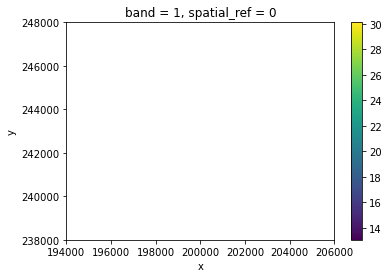

In [11]:
terrain_valid.plot()

There are many ways to improve this plot. Matplotlib offers lots of different functions to change the position and appearance of plot elements. To plot with Matplotlib, you need to import the pyplot module. Something that would really improve our figure is adding a title. This can be done with the plt.title() function

Text(0.5, 1.0, 'Digital Terrain Model')

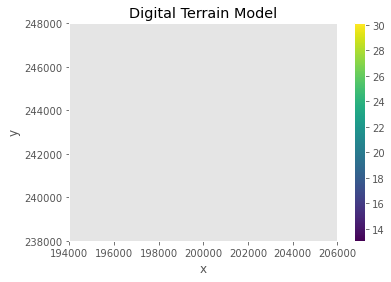

In [26]:
terrain_valid.plot()
plt.title("Digital Terrain Model")

Text(0.5, 1.0, 'Histogram of Canopy Height in Meters')

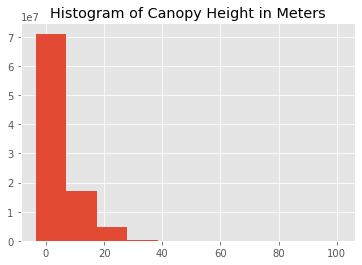

In [24]:
plt.figure()
plt.style.use('ggplot') # adds a style to improve the aesthetics
canopy_k3.plot.hist()
plt.title("Histogram of Canopy Height in Meters")

In [5]:
print(surface.rio.crs)
print(surface.rio.nodata)
print(surface.rio.bounds())
print(surface.rio.width)
print(surface.rio.height)

EPSG:31370
-9999.0
(18500.0, 198000.0, 34000.0, 206500.0)
15500
8500


In [6]:
surface.values


array([[[-9.999e+03, -9.999e+03, -9.999e+03, ...,  5.600e-01,
          5.700e-01,  6.000e-01],
        [-9.999e+03, -9.999e+03, -9.999e+03, ...,  6.200e-01,
          5.400e-01,  6.000e-01],
        [-9.999e+03, -9.999e+03, -9.999e+03, ...,  6.300e-01,
          6.700e-01,  6.200e-01],
        ...,
        [ 2.440e+00,  3.910e+00,  2.470e+00, ...,  4.930e+00,
          4.920e+00,  4.900e+00],
        [ 1.960e+00,  1.800e+00,  3.120e+00, ...,  4.930e+00,
          4.900e+00,  4.900e+00],
        [ 1.120e+00,  4.580e+00,  3.860e+00, ...,  4.890e+00,
          4.940e+00,  4.890e+00]]], dtype=float32)

In [ ]:
surface.plot().show(robust=True)

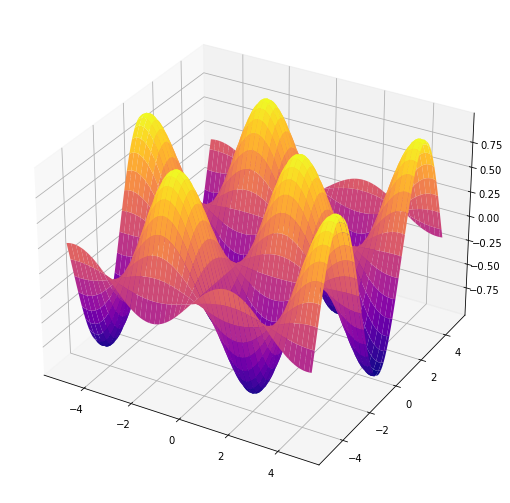

In [17]:
fig = plt.figure(figsize = [15,9])

ax = plt.axes(projection = '3d')

x_data = np.arange(-5, 5, 0.1)
y_data = np.arange(-5, 5, 0.1)

X, Y = np.meshgrid(x_data, y_data)
Z = np.sin(X) * np.cos(Y)

ax.plot_surface(X, Y, Z, cmap = 'plasma')
plt.show()

In [12]:
df = pd.read_csv('list_of_bounds.csv') 
df.head()

,File Number,"""Left Bound""","""Right Bound""","""Top Bound""","""Bottom Bound"""
0,1,145000.0,162000.0,247000.0,238000.0
1,2,162000.0,194000.0,250000.0,238000.0
2,3,194000.0,206000.0,248000.0,238000.0
3,4,53000.0,66000.0,225500.0,218000.0
4,5,66000.0,98000.0,232000.0,218000.0
